### k-Nearest Neighbors

Run the following cell to import the required packages:

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

Sources: 

https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

https://towardsdatascience.com/implement-k-nearest-neighbors-classification-algorithm-c99be8f14052

https://www.geeksforgeeks.org/k-nearest-neighbours/

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

<img src="images/k1.png" width="400">

As an example, consider the following table of data points containing two features:

<img src="images/k2.png" width="400">

Now, given another set of data points (also called testing data), allocate these points a group by analyzing the training set. Note that the unclassified points are marked as ‘White’.

<img src="images/k3.png" width="400">

If we plot these points on a graph, we may be able to locate some clusters or groups. Now, given an unclassified point, we can assign it to a group by observing what group its nearest neighbors belong to. This means a point close to a cluster of points classified as ‘Red’ has a higher probability of getting classified as ‘Red’.

Intuitively, we can see that the first point (2.5, 7) should be classified as ‘Green’ and the second point (5.5, 4.5) should be classified as ‘Red’.

***k-Nearest Neighbor algorithm**

Let m be the number of training data samples. Let p be an unknown point.

1. Store the training samples in an array of data points.

2. Calculate the distance between each of the training data points and the point p.

3. Take the k-smallest distances obtained. Each of these distances corresponds to an already classified data point.

4. Return the majority label among among these k points.

K can be kept as an odd number so that we can calculate a clear majority in the case where only two groups are possible (e.g. Red/Blue). 

## How do we choose the factor of k?

Notice the boundary for these various k values:

<img src="images/k5.png" width="600">

If you watch carefully, you can see that the boundary becomes smoother with increasing value of K. With K increasing to infinity it finally becomes all blue or all red depending on the total majority.  The training error rate and the validation error rate are two parameters we need to access on different K-value. Following is the curve for the training error rate with varying value of K :

<img src="images/k6.png" width="600">

As you can see, the error rate at K=1 is always zero for the training sample. This is because the closest point to any training data point is itself.Hence the prediction is always accurate with K=1. If validation error curve would have been similar, our choice of K would have been 1. Following is the validation error curve with varying value of K:

<img src="images/k7.png" width="600">

This makes the story more clear. At K=1, we we're overfitting the boundaries. Hence, error rate initially decreases and reaches a minima. After the minima point, it then increase with increasing K. To get the optimal value of K, you can segregate the training and validation from the initial dataset. Now plot the validation error curve to get the optimal value of K. This value of K should be used for all predictions.

### Scaling the Data
For the kNN algorithm, it is essential that we preprocess the data by scaling it. kNN is a distance-based algorithm and all such distance based algorithms are affected by the scale of the variables. For example, consider the issues inherent in calculating the distance between the points in the graph below, where the $x_1$ values are on a much smaller scale than the $x_2$ values:

<img src="images/k10.png" width="500">

Consider a concrete example in which your data has an age variable which tells about the age of a person in years and an income variable which tells the monthly income of the person in rupees:

<img src="images/k8.png" width="300">

Here the Age of the person ranges from 25 to 40 whereas the income variable ranges from 50,000 to 110,000. The Euclidean distance between observation 1 and 2 will be given as:

$Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)$

which will come out to be around 20000.000625. 

It can be noted here that the high magnitude of income affected the distance between the two points. This will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude (income in this case).


We do not want our algorithm to be affected by the magnitude of these variables. The algorithm should not be biased towards variables with higher magnitude. To overcome this problem, we can bring down all the variables to the same scale. One of the most common technique to do so is normalization where we calculate the mean and standard deviation of the variable. Then for each observation, we subtract the mean and then divide by the standard deviation of that variable:

$x_{\text{norm}} = \frac{x - u}{s}$.



Apart from normalization, there are other methods too to bring down all the variables to the same scale. For example: Min-Max Scaling. Here the scaling is done using the following formula:

$x_{\text{norm}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$.

For now, we will be focusing on the first type. You can try min-max scaling as well. Let’s see how normalization can bring down these variables to same scale and hence improve the performance of these distance based algorithms. If we normalize the above data, it will look like:

<img src="images/k8.png" width="300">

Let’s again calculate the Euclidean distance between observation 1 and 2:
$Euclidean Distance = [(0.608+0.260)^2 + (-0.447+1.192)^2]^(1/2)$
This time the distance is around 1.1438. We can clearly see that the distance is not biased towards the income variable. It is now giving similar weightage to both the variables. Hence, it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN or K-Means (which we'll get to next).


### Heart Example

We are going to use a cleaned, reduced dataset of the Cleveland data located here:


https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Out goal will be to predict the presence of heart disease in a patient or not.


The dataset contains following features:
- age — age in years 
- sex — (1 = male; 0 = female) 
- cp — chest pain type 
- trestbps — resting blood pressure (in mm Hg on admission to the hospital) 
- chol — serum cholestoral in mg/dl 
- fbs — (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
- restecg — resting electrocardiographic results 
- thalach — maximum heart rate achieved 
- exang — exercise induced angina (1 = yes; 0 = no) 
- oldpeak — ST depression induced by exercise relative to rest 
- slope — the slope of the peak exercise ST segment 
- ca — number of major vessels (0–3) colored by flourosopy 
- thal — 3 = normal; 6 = fixed defect; 7 = reversable defect 
- target — have disease or not (1=yes, 0=no)

Let's load the dataset in:

In [3]:
df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's do a test/train:

In [5]:
X = df.drop(columns = ['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Let's scale the data according to the formula $z = \frac{x - u}{s}$.

In [6]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Let's run our kNN algorithm with k=1:

In [7]:

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.7894736842105263


What about k=5?

In [9]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.8157894736842105


What about k=1 to k=20?

In [10]:
for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)

    print(i, model.score(X_test, y_test))

1 0.7894736842105263
2 0.7763157894736842
3 0.8421052631578947
4 0.8421052631578947
5 0.8157894736842105
6 0.8552631578947368
7 0.868421052631579
8 0.868421052631579
9 0.8552631578947368
10 0.8552631578947368
11 0.8421052631578947
12 0.8421052631578947
13 0.8289473684210527
14 0.8289473684210527
15 0.8289473684210527
16 0.8157894736842105
17 0.8289473684210527
18 0.8157894736842105
19 0.8157894736842105


It appears that k=7 may be best. However, we've got a problem:

**Problem:** using a single train-test split means that errors from the original test set are used to select the correct value of `n_neighbors`. This is not OK! Performing any part of the modeling process other than evaluation of the final error metric on the test set is overfitting.

**Solution:** create either an additional split of the training set (train_small and validation) or use cross-validation on the training set, which is really the same thing as a train_small/validation split.

## Cross-validation

Here is what cross-validation on the training set looks like for a single value of `n_neighbors`.

In [11]:
model = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')

print(scores)
print(scores.mean())

[0.76315789 0.84210526 0.82666667]
0.8106432748538012


This can be repeated for multiple values of k and the results used to choose the best value of n_neighbors.

In [12]:
k_scores = []

for k in range(1, 20):

    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    
    k_scores.append((k, scores.mean()))
    
k_scores = pd.DataFrame(k_scores, columns=['k', 'accuracy']).set_index('k')
k_scores.head()

,accuracy
k,
1,0.709415
2,0.771053
3,0.771053
4,0.793099
5,0.810643


We can find the maximum accuracy of the validation set:

In [13]:
k_max = k_scores[k_scores.accuracy==max(k_scores.accuracy)]
k_max

,accuracy
k,
18,0.84152


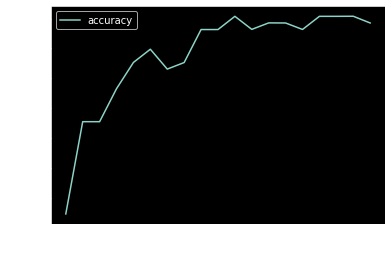

In [14]:
ax = k_scores.plot()
ax.set(xlabel='Number of Neighbors', ylabel='Accuracy');

In our case, we may have more than one contender to check. We can measure the final error value on each of these contenders on the test set.

In [15]:
for k in k_max.index.values:
    # get the model

    model = KNeighborsClassifier(n_neighbors=k)

    # Have to fit on training data again as 
    # cross-validation does not return fitted model

    model = model.fit(X_train, y_train)

    print(model.score(X_test, y_test))

0.8157894736842105


**Problem:** can this process be simplified and adapted to search over multiple parameter options?

**Solution:** use grid search with cross-validation.

## Parameter tuning using `GridSearchCV`

In [16]:
from sklearn.model_selection import GridSearchCV

# create a parameter grid: map the parameter names to the values that should be searched
# Grid search uses all the parameters

param_grid = {'n_neighbors': range(1, 20)}

model = GridSearchCV(KNeighborsClassifier(), 
                    param_grid, 
                    cv=3, 
                    scoring='accuracy')

model = model.fit(X_train, y_train)

print(model.best_params_, model.best_estimator_)

{'n_neighbors': 18} KNeighborsClassifier(n_neighbors=18)


Using the best estimator, we can now calculate the error of the test set:

In [17]:
model = model.best_estimator_

print(model.score(X_test, y_test))

0.8157894736842105
